In [2]:
import pandas as pd

In [9]:
df=pd.read_csv('datafiles/employee.csv', index_col=0)
df

,Name,Year,Department
0,Bob,1,IT
1,Sam,3,Trade
2,Peter,8,HR
3,Jake,2,IT


In [10]:
df.groupby('Department').mean()

,Year
Department,
HR,8.0
IT,1.5
Trade,3.0


In [11]:
df.groupby('Department').agg(['mean','sum','min'])

Year        
           mean sum min
Department             
HR          8.0   8   8
IT          1.5   3   1
Trade       3.0   3   3

In [12]:
d={'Name':['min','max'],
  'Year':['mean','std']}
df.groupby('Department').agg(d)

Name        Year          
              min    max mean       std
Department                             
HR          Peter  Peter  8.0       NaN
IT            Bob   Jake  1.5  0.707107
Trade         Sam    Sam  3.0       NaN

In [16]:
df=pd.read_csv('datafiles/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [21]:
df.pivot_table(index='marital',columns='education',values='balance')

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,1137.680851,902.772647,1700.917063,1417.147929
married,1286.655547,1251.750254,1848.779341,1557.787931
single,1131.215709,1060.546773,1643.351210,1493.657197


In [19]:
pd.crosstab(index=df['marital'], columns=df['education'])

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,752,2815,1471,169
married,5246,13770,7038,1160
single,853,6617,4792,528


In [22]:
df.shape

(45211, 17)

In [23]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [25]:
df['balance'].dtype

dtype('int64')

In [26]:
df['job'].count()

45211

In [27]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [28]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [30]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [32]:
df['marital'].value_counts().idxmax()

'married'

In [33]:
df['marital'].value_counts().idxmin()

'divorced'

In [35]:
df.sort_values(by='balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no


In [36]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [41]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
df=df.sort_values(by='balance', ascending=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [48]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [47]:
df.drop_duplicates(['job','marital'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0,unknown,no
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no
41374,32,entrepreneur,single,tertiary,no,59649,no,no,cellular,1,sep,69,2,-1,0,unknown,no
27390,50,services,married,secondary,no,57435,yes,no,cellular,21,nov,319,3,-1,0,unknown,no
3197,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
43053,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes


In [50]:
tmp_df=df[['balance','age']]
tmp_df

,balance,age
39989,102127,51
26227,98417,59
43393,81204,84
42558,81204,84
41693,71188,60
...,...,...
1896,-3313,57
7413,-3372,43
38736,-4057,60
15682,-6847,49


In [51]:
tmp_df.apply(lambda r:r*2)

,balance,age
39989,204254,102
26227,196834,118
43393,162408,168
42558,162408,168
41693,142376,120
...,...,...
1896,-6626,114
7413,-6744,86
38736,-8114,120
15682,-13694,98


## Visualization

In [52]:
import matplotlib.pyplot as plt

In [81]:
x=[5,5,5,10,10,30,30,20,25,40]

### Histogram

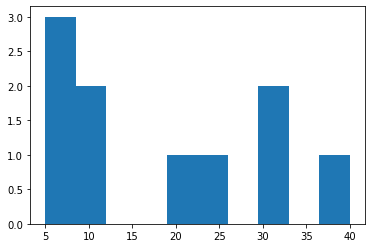

In [56]:
plt.hist(x);
# plt.show()

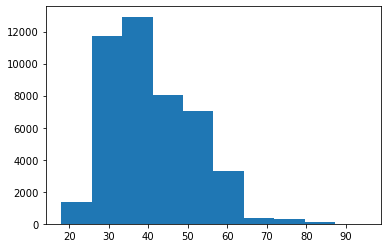

In [65]:
# plt.hist(df['age']);
plt.hist(df.age);

### Pie

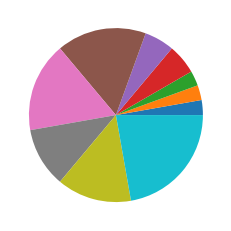

In [58]:
plt.pie(x);

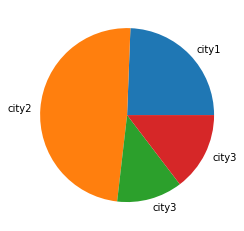

In [60]:
values=[1000,2000,500,600]
labels=['city1', 'city2','city3','city3']
plt.pie(values, labels=labels);

In [77]:
data=df['marital'].value_counts()
data.values
data.index

Index(['married', 'single', 'divorced'], dtype='object')

In [80]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

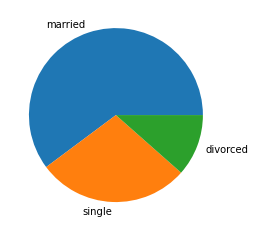

In [78]:
plt.pie(data.values, labels=data.index);

### boxplot

In [82]:
x

[5, 5, 5, 10, 10, 30, 30, 20, 25, 40]

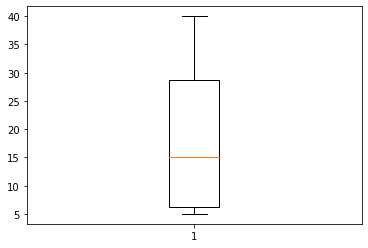

In [84]:
plt.boxplot(x);

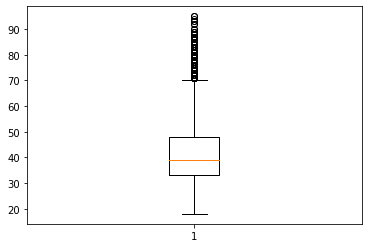

In [87]:
plt.boxplot(df.age);

### Bar

In [91]:
x=[7,8,9,11]
y=[9,4,6,7]

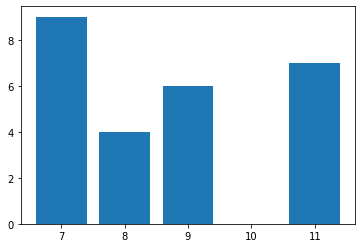

In [93]:
plt.bar(x,y);

In [95]:
df.age.unique()

array([51, 59, 84, 60, 56, 52, 32, 44, 50, 43, 61, 40, 58, 38, 39, 31, 55,
       42, 36, 46, 45, 54, 75, 48, 29, 35, 53, 71, 77, 57, 74, 41, 34, 28,
       33, 49, 47, 26, 27, 24, 37, 69, 65, 63, 68, 30, 23, 64, 72, 25, 67,
       70, 78, 66, 85, 22, 62, 81, 73, 76, 20, 82, 79, 80, 21, 87, 83, 19,
       86, 95, 18, 89, 94, 92, 93, 90, 88])

In [105]:
tmps=df.loc[df.age<70,:].groupby('age').mean()['balance']

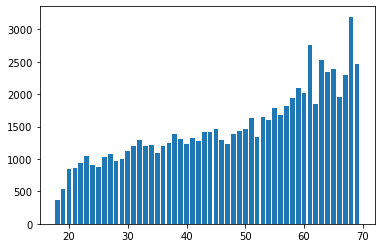

In [106]:
plt.bar(tmps.index,tmps.values);

<BarContainer object of 4 artists>

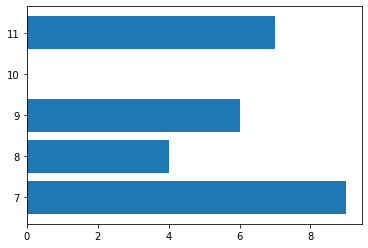

In [107]:
plt.barh(x,y)

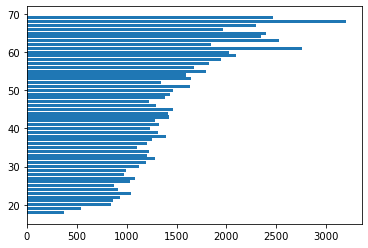

In [108]:
plt.barh(tmps.index,tmps.values);

### Scatter

In [109]:
print(x)
print(y)

[7, 8, 9, 11]
[9, 4, 6, 7]


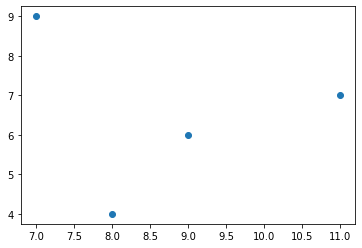

In [111]:
plt.scatter(x,y);

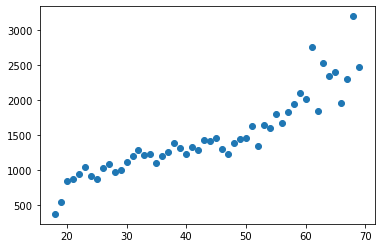

In [116]:
plt.scatter(tmps.index, tmps.values);

In [117]:
z=[8,5,8,4]

In [118]:
print(x)
print(y)
print(z)

[7, 8, 9, 11]
[9, 4, 6, 7]
[8, 5, 8, 4]


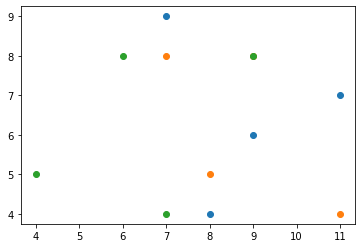

In [123]:
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z);

In [130]:
tmpdf=df.loc[df.age<70,:].groupby('age').mean()[['balance','duration']]

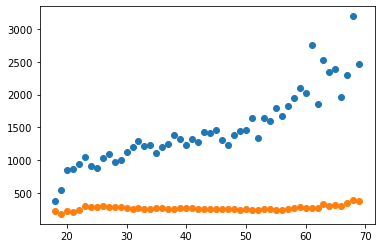

In [134]:
plt.scatter(tmpdf.index,tmpdf.balance)
plt.scatter(tmpdf.index,tmpdf.duration);

### plot

In [135]:
print(x)
print(y)
print(z)

[7, 8, 9, 11]
[9, 4, 6, 7]
[8, 5, 8, 4]


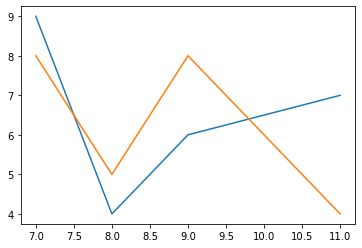

In [139]:
plt.plot(x,y)
plt.plot(x,z);

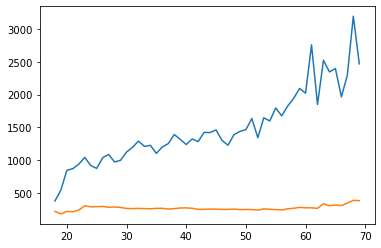

In [142]:
plt.plot(tmpdf.index,tmpdf.balance)
plt.plot(tmpdf.index,tmpdf.duration);

In [ ]:
# plt.hist(x)
# plt.pie(x)
# plt,boxplot(x)

# plt.bar(x,y)
# plt.barh(x,y)
# plt.scatter(x,y)
# plt.plot(x,y)

### Decorating the chart

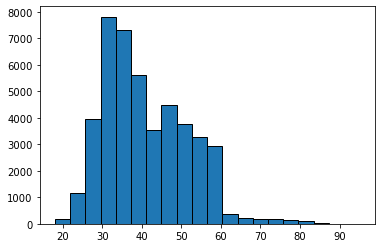

In [159]:
plt.hist(df['age'].sort_values(), bins=20, orientation='vertical', edgecolor='black');

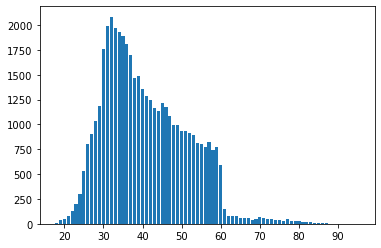

In [177]:
plt.bar(tdf.age,tdf.freq);

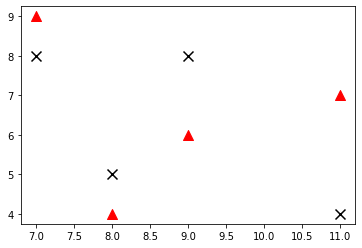

In [190]:
plt.scatter(x,y, s=100, c='red', marker='^')
plt.scatter(x,z, s=100, c='black', marker='x');

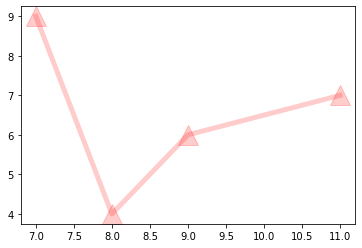

In [205]:
# alpha: [0,1]
plt.plot(x,y, c='red',linewidth=5, marker='^', markersize=20, alpha=0.2);

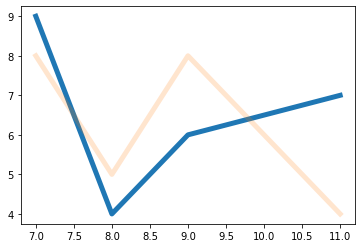

In [212]:
plt.plot(x,y, linewidth=5)
plt.plot(x,z,linewidth=5, alpha=0.2);

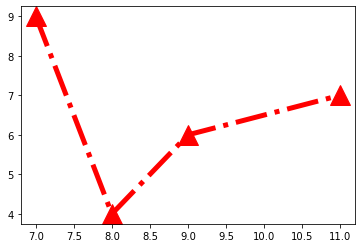

In [222]:
plt.plot(x,y, c='red', marker='^', linestyle='-.', linewidth=5, markersize=20);

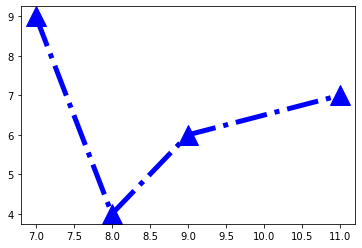

In [226]:
plt.plot(x,y, 'b^-.', linewidth=5, markersize=20);

## Features for the plot

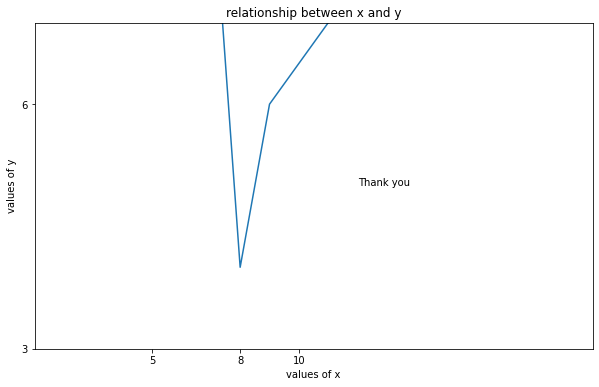

In [241]:
plt.figure(figsize=(10,6))
# plt.yscale('log')
plt.title('relationship between x and y')
plt.xlabel('values of x')
plt.ylabel('values of y')
plt.xlim(1,20)
plt.ylim(3,7)
plt.xticks([5,8,10])
plt.yticks([3,6])
plt.text(12,5,'Thank you')
plt.plot(x,y);

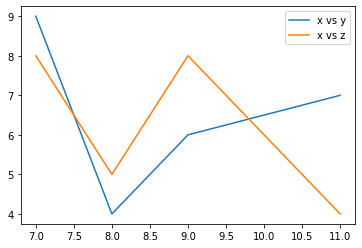

In [253]:
plt.plot(x,y,label='x vs y')
plt.plot(x,z, label='x vs z')
plt.legend(loc=1)
plt.savefig('plot1.png')

**Exercise 1**

'gold_data.txt' contains historical gold prices (end of year) from 1792 to 2015.

- Read the data as dataframe
- Plot the data with time on the horizontal axis and gold price on the vertical.  Provide a title and labels for the horizontal and vertical axes.
- Plot the the data again using a log vertical scale.
Use `plt.yscale('log')`

- The US dollar was removed from a gold standard in 1973.  Plot the data again, on a linear scale (normal scale), from 1972 and after.  Label the point representing peak price.  

In [261]:
f=open('gold_data.txt')
lines=f.readlines()
f.close()
years=list(map(int, lines[::2]))

In [268]:
prices=[float(l.strip().replace('$','').replace(',','')) for l in lines[1::2]]

In [270]:
df=pd.DataFrame({'year':years, 'price':prices})
df

,year,price
0,2015,1060.00
1,1994,383.25
2,1973,106.48
3,2014,1199.25
4,1993,391.75
...,...,...
217,1795,19.39
218,1809,19.39
219,1794,19.39
220,1808,19.39


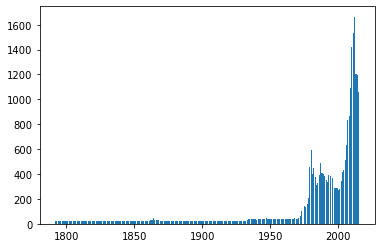

In [272]:
# Plot the data with time on the horizontal axis and gold price on the vertical. 
# Provide a title and labels for the horizontal and vertical axes.
plt.bar(df.year, df.price);

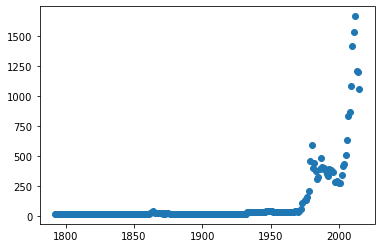

In [274]:
plt.scatter(df.year, df.price);

In [279]:
df=df.sort_values(by='year')

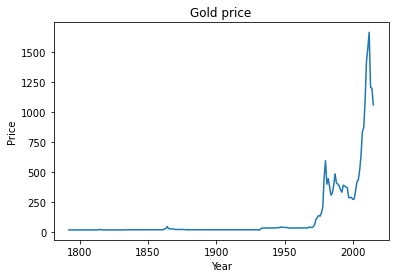

In [282]:
plt.plot(df.year, df.price)
plt.title('Gold price')
plt.xlabel('Year')
plt.ylabel('Price');

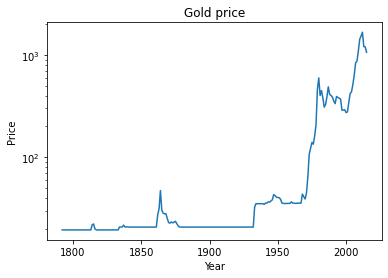

In [283]:
# Plot the the data again using a log vertical scale. Use plt.yscale('log')
plt.plot(df.year, df.price)
plt.yscale('log')
plt.title('Gold price')
plt.xlabel('Year')
plt.ylabel('Price');

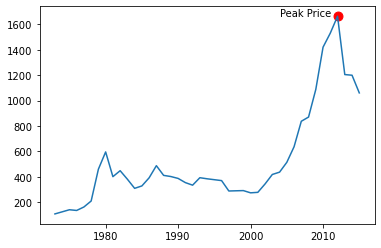

In [305]:
# The US dollar was removed from a gold standard in 1973. 
# Plot the data again, on a linear scale (normal scale), from 1972 and after. 
# Label the point representing peak price.
tdf=df.loc[df.year>=1973,:]
plt.plot(tdf.year, tdf.price);
plt.scatter(max_year, max_price, c='red', s=80)
plt.text(max_year-8, max_price, 'Peak Price');

In [290]:
max_price=tdf.price.max()
df.loc[df.price==tdf.price.max(),:]

,year,price
9,2012,1664.0


In [296]:
df.loc[df.price==max_price,'year']

9    2012
Name: year, dtype: int64

In [297]:
max_year=df.set_index('year').price.idxmax()